In [1]:
#Load library
library(tidyverse)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
### Volcano plot for log2FC > 1 and Padj < 0.05 ####
#Load Total table
Total_rh <- read.csv("01.DESeq_results/total_rh_gene.csv")

colnames(Total_rh)

Total_rh <- Total_rh %>%
  select(1, 3, 7, 9, 13)

colnames(Total_rh) <- c("Gene", "Log2FC_early", "Padj_early", "Log2FC_late", "Padj_late")

[1] "Gene"                      "baseMean_RHAM_30min"      
 [3] "log2FoldChange_RHAM_30min" "lfcSE_RHAM_30min"         
 [5] "stat_RHAM_30min"           "pvalue_RHAM_30min"        
 [7] "padj_RHAM_30min"           "baseMean_RHAM_90min"      
 [9] "log2FoldChange_RHAM_90min" "lfcSE_RHAM_90min"         
[11] "stat_RHAM_90min"           "pvalue_RHAM_90min"        
[13] "padj_RHAM_90min"

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


pdf 
  2

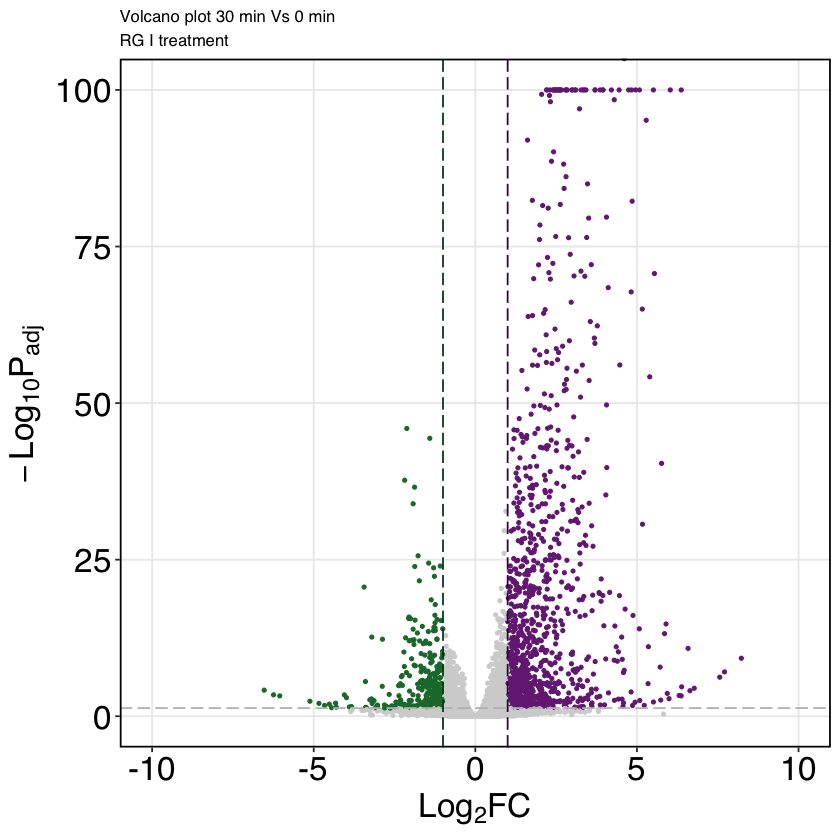

In [3]:
# make index for early
Total_rh_early_v_FC1 <- na.omit(Total_rh)
Total_rh_early_v_FC1$diffexpressed <- "NO"
Total_rh_early_v_FC1$diffexpressed[Total_rh_early_v_FC1$Log2FC_early > 1 & Total_rh_early_v_FC1$Padj_early < 0.05] <- "UP"
Total_rh_early_v_FC1$diffexpressed[Total_rh_early_v_FC1$Log2FC_early < -1 & Total_rh_early_v_FC1$Padj_early < 0.05] <- "DOWN"

# draw and save volcano plot

vplot_early_FC1 <- "02.Volcano_plot/Volcano_RGI_early_FC1.pdf"
pdf(vplot_early_FC1, width = 6, height = 4.5)
vplot_early <- ggplot(Total_rh_early_v_FC1) +
  aes(y=-log10(Padj_early), x=Log2FC_early, text = paste("Symbol:", Gene), col=diffexpressed) +
  geom_point(size=0.8) +  # Adjusted dot size
  geom_hline(yintercept = -log10(0.05), linetype="longdash", colour="grey", size=0.5) +  # Reduced h line thickness
  geom_vline(xintercept = 1, linetype="longdash", colour="#40004b", size=0.5) +  # Reduced v line thickness
  geom_vline(xintercept = -1, linetype="longdash", colour="#00441b", size=0.5) +  # Reduced v line thickness
  labs(title="Volcano plot 30 min Vs 0 min",
       subtitle = "RG I treatment",
       x = expression(Log[2]*FC),
       y = expression(-Log[10]*P[adj])) +  # Customize y-axis label with subscript
  theme_bw() +
  scale_color_manual(values=c("#1b7837","lightgray","#762a83")) +
  scale_x_continuous(limits = c(-10, 10), oob = scales::squish) +  # Set x-axis limits
  scale_y_continuous(limits = c(0, 100), oob = scales::squish) +  # Set y-axis limits
  theme(legend.position = "none",
        #        panel.grid.major = element_blank(),  # Remove major grid
        panel.grid.minor = element_blank(),  # Remove minor grid
        panel.border = element_rect(linewidth = 1, colour = "black"),  # Adjust plot border thickness and color
        axis.text = element_text(size = 20, family = "Helvetica", colour = "black"),  # Increase axis text size and change font
        axis.title = element_text(size = 20, family = "Helvetica", colour = "black"),  # Adjust axis title font
        plot.title = element_text(size = 10, family = "Helvetica"),  # Adjust plot title font
        plot.subtitle = element_text(size = 10, family = "Helvetica"))  # Adjust plot subtitle font
vplot_early
dev.off()
vplot_early

pdf 
  2

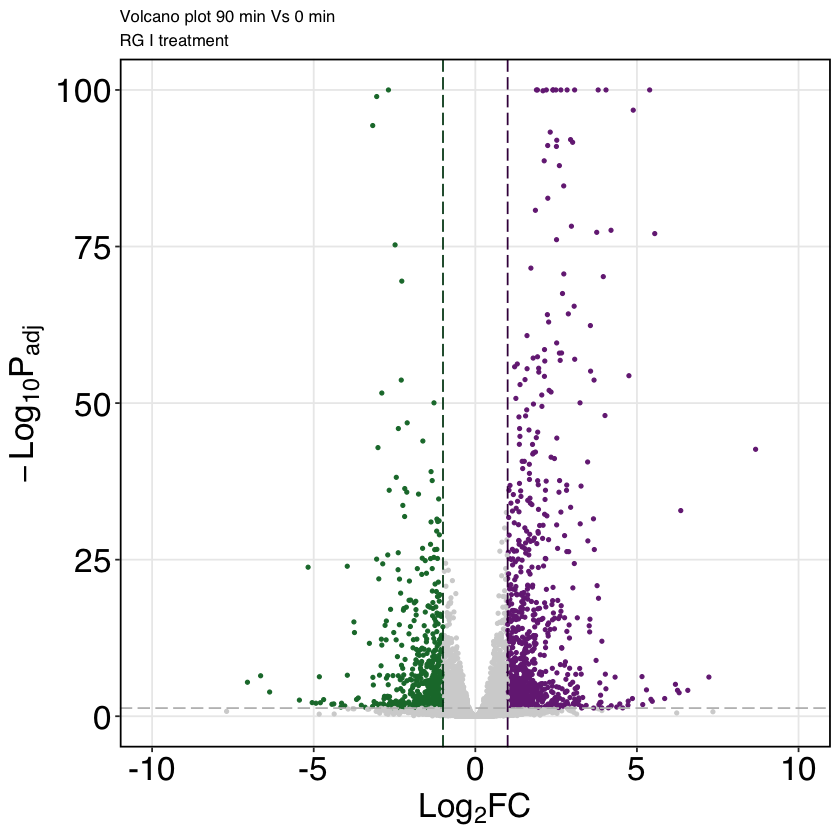

In [4]:
# make index for late
Total_rh_late_v_FC1 <- na.omit(Total_rh)
Total_rh_late_v_FC1$diffexpressed <- "NO"
Total_rh_late_v_FC1$diffexpressed[Total_rh_late_v_FC1$Log2FC_late > 1 & Total_rh_late_v_FC1$Padj_late < 0.05] <- "UP"
Total_rh_late_v_FC1$diffexpressed[Total_rh_late_v_FC1$Log2FC_late < -1 & Total_rh_late_v_FC1$Padj_late < 0.05] <- "DOWN"

# draw and save volcano plot
vplot_late_FC1 <- "02.Volcano_plot/Volcano_RGI_late_FC1.pdf"
pdf(vplot_late_FC1, width = 6, height = 4.5)
vplot_late <- ggplot(Total_rh_late_v_FC1) +
  aes(y=-log10(Padj_late), x=Log2FC_late, text = paste("Symbol:", Gene), col=diffexpressed) +
  geom_point(size=0.8) +  # Adjusted dot size
  geom_hline(yintercept = -log10(0.05), linetype="longdash", colour="grey", size=0.5) +  # Reduced h line thickness
  geom_vline(xintercept = 1, linetype="longdash", colour="#40004b", size=0.5) +  # Reduced v line thickness
  geom_vline(xintercept = -1, linetype="longdash", colour="#00441b", size=0.5) +  # Reduced v line thickness
  labs(title="Volcano plot 90 min Vs 0 min",
       subtitle = "RG I treatment",
       x = expression(Log[2]*FC),
       y = expression(-Log[10]*P[adj])) +  # Customize y-axis label with subscript
  theme_bw() +
  scale_color_manual(values=c("#1b7837","lightgray","#762a83")) +
  scale_x_continuous(limits = c(-10, 10), oob = scales::squish) +  # Set x-axis limits
  scale_y_continuous(limits = c(0, 100), oob = scales::squish) +  # Set y-axis limits
  theme(legend.position = "none",
        #        panel.grid.major = element_blank(),  # Remove major grid
        panel.grid.minor = element_blank(),  # Remove minor grid
        panel.border = element_rect(linewidth = 1, colour = "black"),  # Adjust plot border thickness and color
        axis.text = element_text(size = 20, family = "Helvetica", colour = "black"),  # Increase axis text size and change font
        axis.title = element_text(size = 20, family = "Helvetica", colour = "black"),  # Adjust axis title font
        plot.title = element_text(size = 10, family = "Helvetica"),  # Adjust plot title font
        plot.subtitle = element_text(size = 10, family = "Helvetica"))  # Adjust plot subtitle font
vplot_late
dev.off()
vplot_late